In [1]:
import numpy as np
import pandas as pd


In [2]:
import os

In [3]:
import tqdm

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
! ls breakpoint_coordinates/

0009b464-b376-4fbc-8a56-da538269a02f.tsv
003819bc-c415-4e76-887c-931d60ed39e7.tsv
0040b1b6-b07a-4b6e-90ef-133523eaf412.tsv
00493087-9d9d-40ca-86d5-936f1b951c93.tsv
00508f2b-36bf-44fc-b66b-97e1f3e40bfa.tsv
005794f1-5a87-45b5-9811-83ddf6924568.tsv
005e85a3-3571-462d-8dc9-2babfc7ace21.tsv
007aab66-2f07-459d-8952-3041d6ea24a8.tsv
008aef39-0c97-48ce-9dfd-f12d67116c59.tsv
008bad10-d41b-4bbb-86fa-9976ecea46b1.tsv
00aa769d-622c-433e-8a8a-63fb5c41ea42.tsv
00b9d0e6-69dc-4345-bffd-ce32880c8eef.tsv
00bf0350-8c7c-4b9e-8143-13ea2dc1122f.tsv
00c27940-c623-11e3-bf01-24c6515278c0.tsv
00db1b95-8ca3-4cc4-bb46-6b8c8019a7c7.tsv
00db4dc2-3ec7-4ff9-9233-d69c8c8a607f.tsv
01658141-8398-4585-9f0f-8355dd9b0604.tsv
0168a2a6-c3af-4d58-a51c-d33f0fc7876d.tsv
0176cf1d-0760-4769-a493-277f4bb7585e.tsv
0192d529-7340-45d8-a5f0-249cbb11ca19.tsv
01b0848c-ae36-4ade-a3da-d297b003c99f.tsv
01c8e465-2b4e-4519-bdef-c3ac06b43eeb.tsv
01dc6872-c623-11e3-bf01-24c6515278c0.tsv
01df36af-3617-40fc-9892-f54ce433cf71.tsv
02078f77-2b35-4f

In [6]:
! ls breakpoint_coordinates/ | wc -l

2748


In [7]:
file_ids = sorted(list(os.listdir('final_consensus_sv_bedpe/')))
file_ids = sorted([x.split('.')[0] for x in file_ids])
file_ids


['0009b464-b376-4fbc-8a56-da538269a02f',
 '003819bc-c415-4e76-887c-931d60ed39e7',
 '0040b1b6-b07a-4b6e-90ef-133523eaf412',
 '00493087-9d9d-40ca-86d5-936f1b951c93',
 '00508f2b-36bf-44fc-b66b-97e1f3e40bfa',
 '005794f1-5a87-45b5-9811-83ddf6924568',
 '005e85a3-3571-462d-8dc9-2babfc7ace21',
 '007aab66-2f07-459d-8952-3041d6ea24a8',
 '008aef39-0c97-48ce-9dfd-f12d67116c59',
 '008bad10-d41b-4bbb-86fa-9976ecea46b1',
 '00aa769d-622c-433e-8a8a-63fb5c41ea42',
 '00b9d0e6-69dc-4345-bffd-ce32880c8eef',
 '00bf0350-8c7c-4b9e-8143-13ea2dc1122f',
 '00c27940-c623-11e3-bf01-24c6515278c0',
 '00db1b95-8ca3-4cc4-bb46-6b8c8019a7c7',
 '00db4dc2-3ec7-4ff9-9233-d69c8c8a607f',
 '01658141-8398-4585-9f0f-8355dd9b0604',
 '0168a2a6-c3af-4d58-a51c-d33f0fc7876d',
 '0176cf1d-0760-4769-a493-277f4bb7585e',
 '0192d529-7340-45d8-a5f0-249cbb11ca19',
 '01b0848c-ae36-4ade-a3da-d297b003c99f',
 '01c8e465-2b4e-4519-bdef-c3ac06b43eeb',
 '01dc6872-c623-11e3-bf01-24c6515278c0',
 '01df36af-3617-40fc-9892-f54ce433cf71',
 '02078f77-2b35-

In [8]:
df_chromo = pd.read_excel('chromo_table.xlsx')

In [9]:
len(df_chromo), len(df_chromo) / 23

(55844, 2428.0)

In [10]:
df_chromo

,donor_unique_id,Chr,Start,End,Intrchr. SVs,Total SVs (intrachr. + transl.),SVs in sample,Nb. DEL,Nb. DUP,Nb. h2hINV,...,tobacco_smoking_intensity,alcohol_history,alcohol_history_intensity,donor_wgs_included_excluded,histology_abbreviation,tissue.y,code,event,response,comment
0,BLCA-US::096b4f32-10c1-4737-a0dd-cae04c54ee33,1,33384961.0,151855802.0,2,3,136,0,0,0,...,NaN,NaN,NaN,Included,Bladder-TCC,BLCA,US,1,14.90,NaN
1,BLCA-US::096b4f32-10c1-4737-a0dd-cae04c54ee33,2,123278460.0,153873571.0,4,4,136,2,0,1,...,NaN,NaN,NaN,Included,Bladder-TCC,BLCA,US,1,14.90,NaN
2,BLCA-US::096b4f32-10c1-4737-a0dd-cae04c54ee33,3,31044413.0,84685234.0,12,12,136,2,2,4,...,NaN,NaN,NaN,Included,Bladder-TCC,BLCA,US,1,14.90,NaN
3,BLCA-US::096b4f32-10c1-4737-a0dd-cae04c54ee33,4,176301814.0,177594189.0,2,2,136,0,0,1,...,NaN,NaN,NaN,Included,Bladder-TCC,BLCA,US,1,14.90,NaN
4,BLCA-US::096b4f32-10c1-4737-a0dd-cae04c54ee33,5,67743249.0,176695147.0,14,14,136,2,4,5,...,NaN,NaN,NaN,Included,Bladder-TCC,BLCA,US,1,14.90,NaN
5,BLCA-US::096b4f32-10c1-4737-a0dd-cae04c54ee33,6,84881107.0,166575966.0,6,6,136,2,0,3,...,NaN,NaN,NaN,Included,Bladder-TCC,BLCA,US,1,14.90,NaN
6,BLCA-US::096b4f32-10c1-4737-a0dd-cae04c54ee33,7,20274268.0,50455591.0,1,2,136,2,0,0,...,NaN,NaN,NaN,Included,Bladder-TCC,BLCA,US,1,14.90,NaN
7,BLCA-US::096b4f32-10c1-4737-a0dd-cae04c54ee33,8,26699092.0,143654659.0,19,19,136,3,4,6,...,NaN,NaN,NaN,Included,Bladder-TCC,BLCA,US,1,14.90,NaN
8,BLCA-US::096b4f32-10c1-4737-a0dd-cae04c54ee33,9,21746903.0,101943231.0,1,3,136,2,0,0,...,NaN,NaN,NaN,Included,Bladder-TCC,BLCA,US,1,14.90,NaN
9,BLCA-US::096b4f32-10c1-4737-a0dd-cae04c54ee33,10,108244751.0,109463787.0,1,1,136,1,0,0,...,NaN,NaN,NaN,Included,Bladder-TCC,BLCA,US,1,14.90,NaN


In [11]:
df_wgs = pd.read_csv('WGS.metadata.tsv', sep='\t')

100%|██████████| 2748/2748 [00:08<00:00, 321.66it/s]


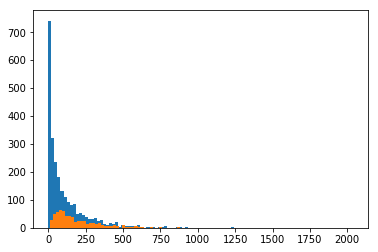

In [12]:
found = list()
chromo_affected = list()

for fn in tqdm.tqdm(file_ids):
    mask = df_wgs['aliquot_id'] == fn
    df_wgs_masked = df_wgs.loc[mask]
    donor_id = list(df_wgs_masked['donor_unique_id'])[0]
    df_chromo_donor = df_chromo.loc[df_chromo['donor_unique_id'] == donor_id]
    chromosome_count = len(df_chromo_donor)
    if chromosome_count == 23:
        if list(df_chromo_donor['chromo'])[0] == 1:
            chromo_affected.append(1)
        else:
            chromo_affected.append(0)
    found.append(chromosome_count)

found = np.array(found)
chromo_affected = np.array(chromo_affected)

set(found)

a = np.sum(found) / 23
b = len(file_ids)

a, b, a / b


a = np.sum(chromo_affected)
b = len(chromo_affected)

a, b, a / b

# number of breakpoints

svn_n = list()

i = 0
for fn in tqdm.tqdm(file_ids):
    if found[i] == 23:
        fp = os.path.join('final_consensus_sv_bedpe/',
                          fn + '.bedpe')
        df = pd.read_csv(fp, sep='\t')
        svn_n.append(len(df))
    i += 1
svn_n = np.array(svn_n)

np.min(svn_n), np.mean(svn_n), np.max(svn_n)

np.percentile(svn_n, 10), \
np.percentile(svn_n, 30), \
np.percentile(svn_n, 50), \
np.percentile(svn_n, 70), \
np.percentile(svn_n, 90)

plt.hist(svn_n, bins=100);

svn_n_chromo = svn_n[chromo_affected == 1]

np.min(svn_n_chromo), np.mean(svn_n_chromo), np.max(svn_n_chromo)

np.percentile(svn_n_chromo, 10), \
np.percentile(svn_n_chromo, 30), \
np.percentile(svn_n_chromo, 50), \
np.percentile(svn_n_chromo, 70), \
np.percentile(svn_n_chromo, 90)

plt.hist(svn_n_chromo, bins=100);

In [13]:
# dataset of names

"""df_names = pd.DataFrame(columns=['file_name', 'donor_id'])


df_names['file_name'] = file_ids

for i in tqdm.tnrange(len(df_names)):
    fn = df_names.loc[i]['file_name']
    mask = df_wgs['aliquot_id'] == fn
    df_wgs_masked = df_wgs.loc[mask]
    donor_id = list(df_wgs_masked['donor_unique_id'])[0]
    df_chromo_donor = df_chromo.loc[df_chromo['donor_unique_id'] == donor_id]
    chromosome_count = len(df_chromo_donor)
    if chromosome_count == 23:
        df_names.loc[i]['donor_id'] = donor_id

df_names = df_names.loc[df_names['donor_id'].notna()]

df_names.to_csv('all_names.tsv', sep='\t', index=False)
"""

In [14]:
df_names = pd.read_csv('all_names.tsv', sep='\t')

In [15]:
df_names

,file_name,donor_id
0,0009b464-b376-4fbc-8a56-da538269a02f,OV-AU::AOCS-117
1,003819bc-c415-4e76-887c-931d60ed39e7,PBCA-DE::ICGC_PA107
2,0040b1b6-b07a-4b6e-90ef-133523eaf412,LINC-JP::HX17
3,00493087-9d9d-40ca-86d5-936f1b951c93,LGG-US::fc3b7596-f515-446f-81db-fed0154ca2c5
4,00508f2b-36bf-44fc-b66b-97e1f3e40bfa,PAEN-AU::ICGC_0498
5,005794f1-5a87-45b5-9811-83ddf6924568,RECA-EU::C0014
6,005e85a3-3571-462d-8dc9-2babfc7ace21,EOPC-DE::EOPC-057
7,007aab66-2f07-459d-8952-3041d6ea24a8,THCA-US::e35b2928-8784-45d0-a71a-a2df161542fa
8,008aef39-0c97-48ce-9dfd-f12d67116c59,PRAD-CA::CPCG0128
9,008bad10-d41b-4bbb-86fa-9976ecea46b1,PRAD-CA::CPCG0095


In [16]:
! cat all_names.tsv


file_name	donor_id
0009b464-b376-4fbc-8a56-da538269a02f	OV-AU::AOCS-117
003819bc-c415-4e76-887c-931d60ed39e7	PBCA-DE::ICGC_PA107
0040b1b6-b07a-4b6e-90ef-133523eaf412	LINC-JP::HX17
00493087-9d9d-40ca-86d5-936f1b951c93	LGG-US::fc3b7596-f515-446f-81db-fed0154ca2c5
00508f2b-36bf-44fc-b66b-97e1f3e40bfa	PAEN-AU::ICGC_0498
005794f1-5a87-45b5-9811-83ddf6924568	RECA-EU::C0014
005e85a3-3571-462d-8dc9-2babfc7ace21	EOPC-DE::EOPC-057
007aab66-2f07-459d-8952-3041d6ea24a8	THCA-US::e35b2928-8784-45d0-a71a-a2df161542fa
008aef39-0c97-48ce-9dfd-f12d67116c59	PRAD-CA::CPCG0128
008bad10-d41b-4bbb-86fa-9976ecea46b1	PRAD-CA::CPCG0095
00aa769d-622c-433e-8a8a-63fb5c41ea42	COAD-US::58facedb-fcb8-4ecf-8338-2bfa4947acef
00b9d0e6-69dc-4345-bffd-ce32880c8eef	MALY-DE::4177856
00bf0350-8c7c-4b9e-8143-13ea2dc1122f	KIRC-US::9dc7812b-c7a2-4de4-bf6d-4c7261384a62
00c27940-c623-11e3-bf01-24c6515278c0	LIRI-JP::RK175
00db1b95-8ca3-4cc4-bb46-6b8c8019a7c7	RECA-EU::C0012
00db4dc2-3ec7-4ff9-9233-d69c8c8a607f	UCEC-US::bad34c92-1e6

In [16]:
file_ids = sorted(list(df_names['file_name']))

In [17]:
df_chromo_high_mask = df_chromo['chromo_label'] == 'High confidence'

df_chromo_high = df_chromo.loc[df_chromo_high_mask]

df_chromo_high = df_chromo_high[
    ['donor_unique_id',
     'Chr',
     'Start',
     'End',
     'Intrchr. SVs',
     'Total SVs (intrachr. + transl.)',
     'SVs in sample',
     'chromo',
     'chromo_label']
]
df_chromo_high = df_chromo_high.rename(columns={'donor_unique_id' : 'donor_id'})

In [18]:
df_chromo_high

,donor_id,Chr,Start,End,Intrchr. SVs,Total SVs (intrachr. + transl.),SVs in sample,chromo,chromo_label
2,BLCA-US::096b4f32-10c1-4737-a0dd-cae04c54ee33,3,31044413.0,84685234.0,12,12,136,1,High confidence
4,BLCA-US::096b4f32-10c1-4737-a0dd-cae04c54ee33,5,67743249.0,176695147.0,14,14,136,1,High confidence
107,BLCA-US::3ed614e7-f356-4d87-985b-d3bbbae3bb40,16,6669849.0,31591597.0,5,13,449,1,High confidence
114,BLCA-US::3ed614e7-f356-4d87-985b-d3bbbae3bb40,X,3858348.0,76848685.0,4,8,449,1,High confidence
141,BLCA-US::493a4ff2-37a5-4b79-928d-83dbfe534556,4,144150885.0,190874076.0,24,27,117,1,High confidence
210,BLCA-US::5d54c742-5a8e-4c40-8d62-95e75e210ab8,4,72403638.0,190385402.0,20,29,175,1,High confidence
218,BLCA-US::5d54c742-5a8e-4c40-8d62-95e75e210ab8,12,15725603.0,31961309.0,5,8,175,1,High confidence
242,BLCA-US::797a71ee-372d-41e5-aeee-5ab3c4661110,13,21033268.0,104354353.0,14,29,145,1,High confidence
249,BLCA-US::797a71ee-372d-41e5-aeee-5ab3c4661110,20,24187366.0,56783859.0,6,14,145,1,High confidence
306,BLCA-US::904a8757-e0c5-41ef-b583-c8f170caaac1,8,5291228.0,33089595.0,12,13,274,1,High confidence


In [27]:
"""
new_column = np.zeros(len(df_names), dtype=int)

donor_id_high_conf = set(df_chromo_high['donor_id'])
for i in tqdm.tnrange(len(df_names)):
    donor_id = list(df_names['donor_id'])[i]
    if donor_id in donor_id_high_conf:
        new_column[i] = 1

df_names.insert(2, 'chromo_high_conf', pd.Series(new_column, index=df_names.index).values)
print(df_names.sum())
df_names
"""

"\nnew_column = np.zeros(len(df_names), dtype=int)\n\ndonor_id_high_conf = set(df_chromo_high['donor_id'])\nfor i in tqdm.tnrange(len(df_names)):\n    donor_id = list(df_names['donor_id'])[i]\n    if donor_id in donor_id_high_conf:\n        new_column[i] = 1\n\ndf_names.insert(2, 'chromo_high_conf', pd.Series(new_column, index=df_names.index).values)\nprint(df_names.sum())\ndf_names\n"

In [24]:
all_breakpoints = pd.DataFrame(columns=['bp_id', 'filename', 'chr', 'start', 'strand', 'chromo'])
all_breakpoints


,bp_id,filename,chr,start,strand,chromo


In [25]:
bp_count = 0

for j in tqdm.tnrange(len(df_names)):
    fn = df_names.loc[j]['file_name']
    df_this = pd.read_csv(os.path.join('breakpoint_coordinates/', fn + '.tsv'), sep='\t')
    
    bp_id_this = pd.Series(np.arange(bp_count, bp_count + len(df_this)), index=df_this.index)
    bp_count += len(bp_id_this)
    df_this.insert(0, 'bp_id', bp_id_this.values)
    
    fn_this = pd.Series(fn, index=df_this.index)
    df_this.insert(1, 'filename', fn_this.values)
    

    chromo_this = np.zeros(len(df_this), dtype=int)
    # assign 1 to some rows in chromo_this column
    donor_id = df_names.loc[j]['donor_id']
    chr_no, start_pos, end_pos = df_chromo_high[
        df_chromo_high['donor_id'] == donor_id
    ][['Chr', 'Start', 'End']].values.T
    chromo_limits = {
        chr_no[i] : {'start' : start_pos[i], 'end' : end_pos[i]} for i in range(len(chr_no))
    }
    for i in range(len(df_this)):
        chr_i, start_i = df_this.loc[i][['chr', 'start']]
        if chr_i in chromo_limits.keys():
            if ((chromo_limits[chr_i]['start'] <= start_i) and
                (start_i <= chromo_limits[chr_i]['end'])):
                chromo_this[i] = 1
    chromo_this = pd.Series(chromo_this, index=df_this.index)
    df_this.insert(5, 'chromo', chromo_this.values)
    
    all_breakpoints = all_breakpoints.append(df_this, ignore_index=True)

# end of cell


In [26]:
all_breakpoints


,bp_id,filename,chr,start,strand,chromo
0,0,0009b464-b376-4fbc-8a56-da538269a02f,1,17378698,+,0
1,1,0009b464-b376-4fbc-8a56-da538269a02f,1,27256756,-,0
2,2,0009b464-b376-4fbc-8a56-da538269a02f,1,32976096,-,0
3,3,0009b464-b376-4fbc-8a56-da538269a02f,1,33354395,-,0
4,4,0009b464-b376-4fbc-8a56-da538269a02f,1,45286744,-,0
5,5,0009b464-b376-4fbc-8a56-da538269a02f,1,45286910,+,0
6,6,0009b464-b376-4fbc-8a56-da538269a02f,1,48120522,-,0
7,7,0009b464-b376-4fbc-8a56-da538269a02f,1,48302609,+,0
8,8,0009b464-b376-4fbc-8a56-da538269a02f,1,70035901,+,0
9,9,0009b464-b376-4fbc-8a56-da538269a02f,1,75449545,-,0


In [29]:
np.sum(list(all_breakpoints['chromo']))


25812

In [27]:
all_breakpoints.to_csv('all_breakpoints.tsv', sep='\t', index=False)


In [28]:
! head all_breakpoints.tsv


bp_id	filename	chr	start	strand	chromo
0	0009b464-b376-4fbc-8a56-da538269a02f	1	17378698	+	0
1	0009b464-b376-4fbc-8a56-da538269a02f	1	27256756	-	0
2	0009b464-b376-4fbc-8a56-da538269a02f	1	32976096	-	0
3	0009b464-b376-4fbc-8a56-da538269a02f	1	33354395	-	0
4	0009b464-b376-4fbc-8a56-da538269a02f	1	45286744	-	0
5	0009b464-b376-4fbc-8a56-da538269a02f	1	45286910	+	0
6	0009b464-b376-4fbc-8a56-da538269a02f	1	48120522	-	0
7	0009b464-b376-4fbc-8a56-da538269a02f	1	48302609	+	0
8	0009b464-b376-4fbc-8a56-da538269a02f	1	70035901	+	0


In [30]:
! ls -lh

total 70M
-rw-r--r-- 1 paul paul  35M апр 25 01:58  all_breakpoints.tsv
-rw-r--r-- 1 paul paul 157K апр 25 01:20  all_names.tsv
drwxr-xr-x 2 paul paul 204K апр 24 17:59  breakpoint_coordinates
-rw-r--r-- 1 paul paul 293K апр 23 22:47 'breakpoint neighbourhood extraction.ipynb'
-rw-r--r-- 1 paul paul 546K апр 25 01:50 'breakpoints single dataset.ipynb'
-rw-rw-r-- 1 paul paul  16M апр 20 20:14  chromo_table.xlsx
drwxr-xr-x 2 paul paul 356K апр 24 16:28  final_consensus_sv_bedpe
drwxr-xr-x 2 paul paul 4,0K апр 24 16:08 'lit rev'
-rw-r--r-- 1 paul paul 363K апр 25 01:16 'name correspondence.ipynb'
-rw-r--r-- 1 paul paul  17M апр 23 00:32  WGS.metadata.tsv
-rw-rw-r-- 1 paul paul 1,4M апр 21 15:14  WGS.metadata.tsv.gz
